In [5]:
import requests
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# The default limit is 100 rows. 
# how to know the upper limit 
# code it such that all the rows are extracted. &limit=50000
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=a41ce851-728e-4d65-8dc5-e0515a01ff31&limit=70000'

data = requests.get(url).text
final = json.loads(data)['result']['records']

df = pd.DataFrame(final)

In [7]:
df.columns
df.describe()

,_id
count,34125.000000
mean,17063.000000
std,9851.183305
min,1.000000
25%,8532.000000
50%,17063.000000
75%,25594.000000
max,34125.000000


Understand how many people have registered as property agents.

    registration_start_yr  salesperson_name
0                    2011              5290
1                    2012               956
2                    2013              1593
3                    2014              1238
4                    2015              1428
5                    2016              1431
6                    2017              2620
7                    2018              3052
8                    2019              3634
9                    2020              3247
10                   2021              5210
11                   2022              4425
12                   2023                 1


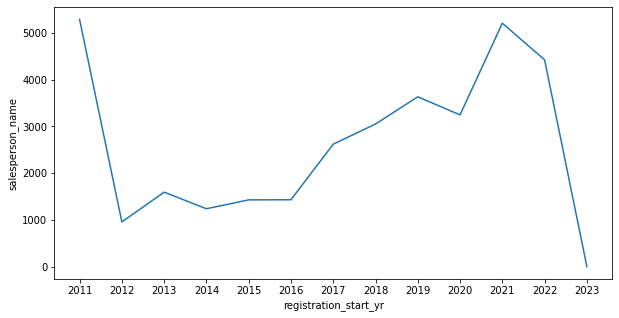

   registration_end_yr  salesperson_name
0                 2022             34124
1                 2024                 1


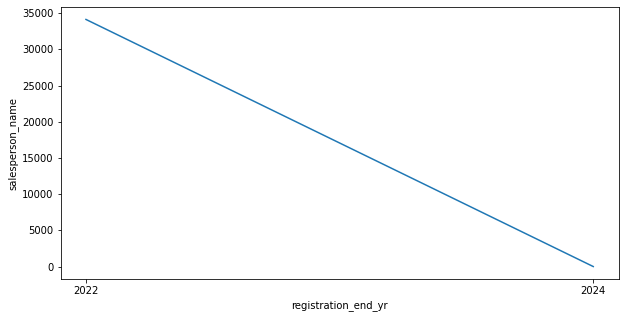

In [8]:
# convert the registeration_start_date into datetime format.
for origin_col_name, derived_col_name in zip(('registration_start_date', 'registration_end_date'),('registration_start_yr', 'registration_end_yr')):
    df[origin_col_name] = pd.to_datetime(df[origin_col_name])
    df[derived_col_name] = df[origin_col_name].dt.year

    # The category should not be put as an index, but rather as a separate column 
    # can be done by using as_index = False
    # to_frame().reset_index()
    df_grouped = df.groupby(derived_col_name, as_index=False)['salesperson_name'].count() # it's a series object. 
   
    # Convert the groupby from a series to dataframe. 
    print(df_grouped)
    plt.figure(figsize=(10,5))
    sns.lineplot(x=derived_col_name, y='salesperson_name', data = df_grouped)
    plt.xticks(df_grouped[derived_col_name])
    # plt.yticks(range(0,7000,1000))
    plt.show()



# EDA 1 : how many agents 


Total no: of Estate agencies: 1136


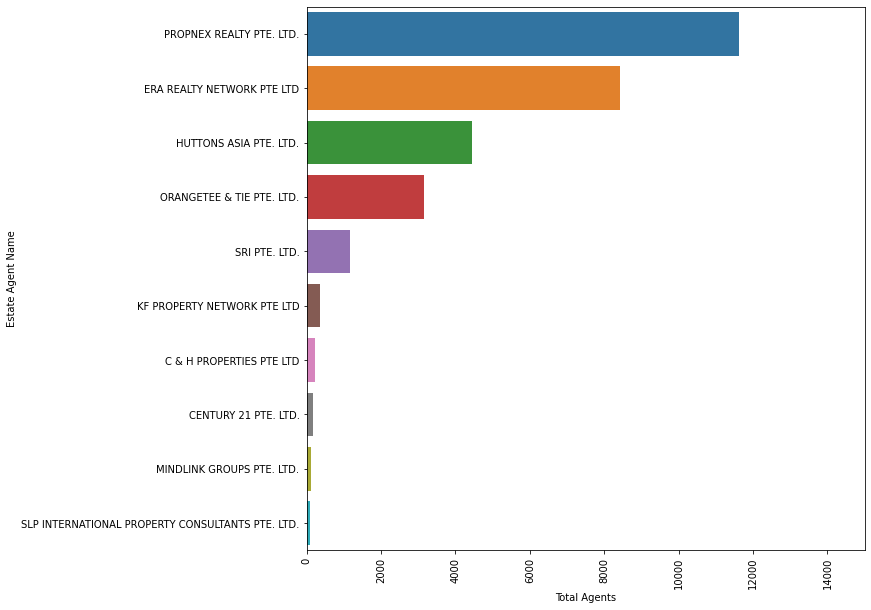

In [30]:
df_grouped = df.groupby('estate_agent_name', as_index=False)['salesperson_name'].count() # it's a series object. 
df_grouped = df_grouped.sort_values(by='salesperson_name', ascending=False)
df_grouped
print('Total no: of Estate agencies:', len(df_grouped))
df_grouped = df_grouped.head(10)

# 80% of the agents are in the 5 agencies. 
plt.figure(figsize=(10,10))

sns.barplot(data=df_grouped, y="estate_agent_name", x='salesperson_name')
plt.xlim(0,15000)
plt.xticks(rotation=90)
plt.xlabel('Total Agents')
plt.ylabel('Estate Agent Name')
# Bring the y-axis to the top and also display the data labels at the top of each bar 
plt.show()


#### Which are the most popular Property agencies ? 

In [31]:
df_grouped.rename(columns={'salesperson_name':'total_count'}, inplace=True)
df_grouped['cum_count'] = round(df_grouped['total_count'].cumsum()/len(df) * 100 ,2)
df_grouped


# 80% of the agents are registered with 4 companies. 
# 1. Propnex Realty
# 2. ERA Realty
# 3. Huttons Asia 
# 4. OrangeTee & Tie Pte. Ltd. 

,estate_agent_name,total_count,cum_count
819,PROPNEX REALTY PTE. LTD.,11621,34.05
320,ERA REALTY NETWORK PTE LTD,8418,58.72
460,HUTTONS ASIA PTE. LTD.,4458,71.79
739,ORANGETEE & TIE PTE. LTD.,3156,81.03
972,SRI PTE. LTD.,1178,84.49
552,KF PROPERTY NETWORK PTE LTD,369,85.57
156,C & H PROPERTIES PTE LTD,217,86.20
182,CENTURY 21 PTE. LTD.,161,86.68
680,MINDLINK GROUPS PTE. LTD.,106,86.99
955,SLP INTERNATIONAL PROPERTY CONSULTANTS PTE. LTD.,99,87.28


#### Have these property agencies retained their respective ranks throughout each year ? 

In [37]:
# Plot the 5 companies with top % of registerations per year. 
df.columns
# x-axis | Registeration Year
# y-axis | % of registerations for each companies. 
# Bar Plot companies : top 5 every year. 

df_grouped
# df_group2 = df.groupby(by=['registration_start_yr', 'estate_agent_name'],as_index=False)['salesperson_name'].transform("count")
# # df_group2.sort_values(by='salesperson_name', ascending=False)
# df_group2

,estate_agent_name,total_count,cum_count
819,PROPNEX REALTY PTE. LTD.,11621,34.05
320,ERA REALTY NETWORK PTE LTD,8418,58.72
460,HUTTONS ASIA PTE. LTD.,4458,71.79
739,ORANGETEE & TIE PTE. LTD.,3156,81.03
972,SRI PTE. LTD.,1178,84.49
552,KF PROPERTY NETWORK PTE LTD,369,85.57
156,C & H PROPERTIES PTE LTD,217,86.20
182,CENTURY 21 PTE. LTD.,161,86.68
680,MINDLINK GROUPS PTE. LTD.,106,86.99
955,SLP INTERNATIONAL PROPERTY CONSULTANTS PTE. LTD.,99,87.28


In [64]:
df = df[df.registration_start_yr != 2023]
df_grouped2 = df.groupby(by=['registration_start_yr', 'estate_agent_name'],as_index=False)['salesperson_name'].count()
df_grouped2["yearly_count"] = df_grouped2.groupby(['registration_start_yr'])["salesperson_name"].transform("sum")

df_grouped2['percent_share'] = round(df_grouped2['salesperson_name']*100/df_grouped2['yearly_count'],2)
df_grouped2 = df_grouped2.sort_values(['registration_start_yr', 'percent_share'],ascending=False).groupby('registration_start_yr').head(5)
# df.sort_values([column names- groupby for each year and sort in descending order by percent_share])

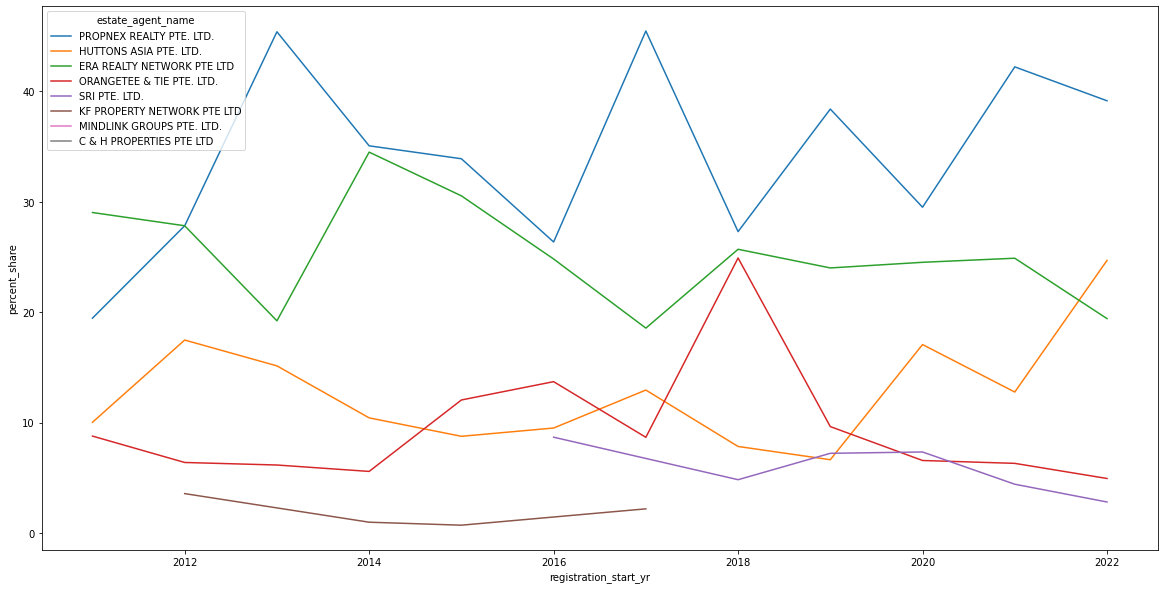

In [71]:
plt.figure(figsize=(20,10))
sns.lineplot(x='registration_start_yr', y='percent_share', hue='estate_agent_name', data =df_grouped2)
# plt.xlabel(df_grouped2['registration_start_yr'])
plt.show()

1. C&H properties disappeared after 2011 out of the top 5 slot.
2. Mindlink Groups only came up in 2013 ? 
3. Propnex, huttons, and ERA Realty, OrangeTee have consistently remained at the top. 
4. the colour order has been preserved as per the year 2022. 
5. 